In [2]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

# manual generation/single replica

In [3]:
def roulette_wheel_selection(vecFit):
    fitNorm=[i/float(sum(vecFit)) for i in vecFit]
    fitNormCumSum=list(np.cumsum(fitNorm))
    rand=random.uniform(0,1)
    for i in range(len(fitNormCumSum)):
        if fitNormCumSum[i]>rand:
            selection=i
            break
    return selection

Je commence avec 5 noeuds complètements connectés.
Je veux arriver jusqu'à 1000
J'en ajoute 3 à chaque initialisation.

In [5]:
#parameters
Nini=5
Nmax=1000
m=3

In [6]:
#initialization : graphe complet avec 5 noeuds
G=nx.complete_graph(Nini)
#node attachment loop:
for t in range(Nini+1,Nmax):
    #à chaque itération, j'ajoute un noeud et de nouveaux liens
    #link attachment loop 
    listNodes=list(G.nodes())
    listk=[G.degree(n) for n in G.nodes()]
    for link in range(m):
        selected=roulette_wheel_selection(listk)
        #pour éviter de le sélectionner de nouveau dans la prochaine itération.
        listk[selected]=0
        G.add_edge(t,listNodes[selected])

In [7]:
k=[G.degree(n) for n in G.nodes()]

In [8]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

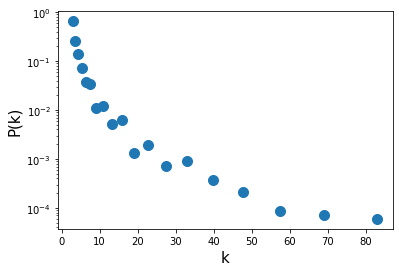

In [9]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

C'est en ligne dans l'espace logarithmique donc c'est bien une loi de puissance. Il joue bien le jeu de créer un réseau **hétérogène** qui suit une loi de puissance. 

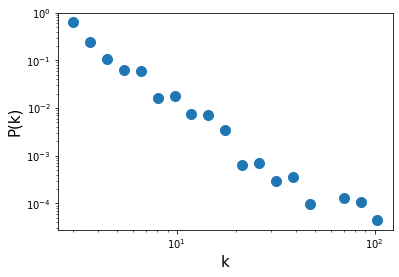

In [16]:
y,x=logBinning(np.array(k),20)
plt.loglog(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

# IT IS A POWER LAW!

# NETWORKX GENERATION / MULTI-REPLICA

In [10]:
#parameters
Nini=5
Nmax=1000
m=3
NREPL=100

Il existe un générateur dans networkx `barabasi_albert_graph`. On voit qu'il est plus performant que son code 

In [11]:
k=[]
for r in range(NREPL):
    G=nx.barabasi_albert_graph(1000,3)
    k=k+[G.degree(n) for n in G.nodes() if G.degree(n)>m]

On voit encore mieux que c'est une loi de puissance.

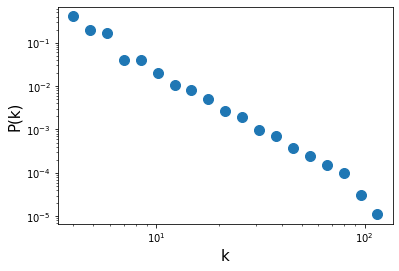

In [12]:
y,x=logBinning(np.array(k),20)
plt.loglog(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

In [20]:
# calculate the exponent of the powerlaw
from scipy.optimize import curve_fit

def power_law (x, m, c):
    return x**m * c

popt, pcov = curve_fit(power_law, x[:-3], y[:-3])

Moyenne = réécouter
Mais écart type devient élevé
=> réseau très hétérogènes

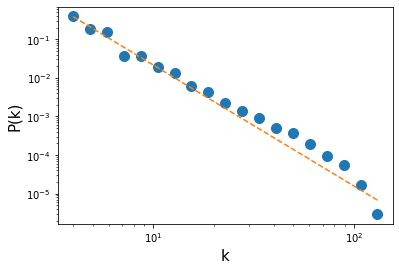

In [21]:
plt.loglog(x,y,'o',markersize=10)
plt.loglog(x, power_law(x, *popt), '--')
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

In [22]:
print (popt)

[-3.136807   29.69717162]
